In [37]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import matplotlib.animation as animation
import os

# Create 'media' folder if it doesn't exist
if not os.path.exists('media'):
    os.makedirs('media')

In [38]:
# Randomly generate realistic masses and positions within a visible range
def generate_masses_and_positions():
    m1 = np.random.uniform(1.0, 10.0)  # Mass between 1 and 10 solar masses
    m2 = np.random.uniform(1.0, 10.0)
    m3 = np.random.uniform(1.0, 10.0)
    p1 = np.random.uniform(-2.5, 2.5, 3)  # Positions within the visual range
    p2 = np.random.uniform(-2.5, 2.5, 3)
    p3 = np.random.uniform(-2.5, 2.5, 3)
    return m1, m2, m3, p1, p2, p3

In [39]:
# Function to simulate and save video
def simulate_and_save_video():
    m1, m2, m3, p1, p2, p3 = generate_masses_and_positions()

    # Initial velocities (fixed for simplicity)
    v1 = [0.0, 0.0, -1.0]
    v2 = [0.0, 0.0, 1.0]
    v3 = [0.0, 0.0, -0.6]

    # Initial conditions
    initial_conditions = np.array([p1, p2, p3, v1, v2, v3]).ravel()

    # Equations of motion (three-body problem)
    def equations(t, state, m1, m2, m3):
        r1, r2, r3 = state[0:3], state[3:6], state[6:9]
        v1, v2, v3 = state[9:12], state[12:15], state[15:18]

        # Gravitational forces
        f1 = m3 * (r3 - r1) / np.linalg.norm(r3 - r1)**3 + m2 * (r2 - r1) / np.linalg.norm(r2 - r1)**3
        f2 = m3 * (r3 - r2) / np.linalg.norm(r3 - r2)**3 + m1 * (r1 - r2) / np.linalg.norm(r1 - r2)**3
        f3 = m1 * (r1 - r3) / np.linalg.norm(r1 - r3)**3 + m2 * (r2 - r3) / np.linalg.norm(r2 - r3)**3
        return np.array([v1, v2, v3, f1, f2, f3]).ravel()

    # Time span (maximum 10 seconds)
    t_start, t_end = 0, 10
    t_points = np.linspace(t_start, t_end, 1000)

    # Solve ODEs
    solution = solve_ivp(equations, t_span=(t_start, t_end), y0=initial_conditions, t_eval=t_points, args=(m1, m2, m3))

    # Extract positions
    t_solution = solution.t
    x1, y1, z1 = solution.y[0], solution.y[1], solution.y[2]
    x2, y2, z2 = solution.y[3], solution.y[4], solution.y[5]
    x3, y3, z3 = solution.y[6], solution.y[7], solution.y[8]

    # Set up 3D plot
    fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
    body1_line, = ax.plot([], [], [], 'green', label='Body 1', linewidth=1)
    body2_line, = ax.plot([], [], [], 'red', label='Body 2', linewidth=1)
    body3_line, = ax.plot([], [], [], 'blue', label='Body 3', linewidth=1)

    # Markers for current positions
    body1_marker, = ax.plot([], [], [], 'o', color='green', markersize=7)
    body2_marker, = ax.plot([], [], [], 'o', color='red', markersize=7)
    body3_marker, = ax.plot([], [], [], 'o', color='blue', markersize=7)

    # Titles and labels
    ax.set_title("Three-Body Problem")
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Z")
    ax.set_xlim([-3, 3])
    ax.set_ylim([-3, 3])
    ax.set_zlim([-3, 3])
    ax.grid()
    plt.legend()

    # Update function for each frame
    def update_frame(i):
        body1_line.set_data(x1[:i], y1[:i])
        body1_line.set_3d_properties(z1[:i])
        body2_line.set_data(x2[:i], y2[:i])
        body2_line.set_3d_properties(z2[:i])
        body3_line.set_data(x3[:i], y3[:i])
        body3_line.set_3d_properties(z3[:i])

        body1_marker.set_data([x1[i]], [y1[i]])
        body1_marker.set_3d_properties([z1[i]])
        body2_marker.set_data([x2[i]], [y2[i]])
        body2_marker.set_3d_properties([z2[i]])
        body3_marker.set_data([x3[i]], [y3[i]])
        body3_marker.set_3d_properties([z3[i]])

    # Set up FFmpeg writer
    writer = animation.FFMpegWriter(fps=30)

    # Create animation
    anim = animation.FuncAnimation(fig, update_frame, frames=len(t_solution), interval=1000/30, repeat=False)

    # Save video
    video_filename = f"media/three_body_problem_{np.random.randint(1000)}.mp4"
    anim.save(video_filename, writer=writer)

    print(f"Video saved as {video_filename}")

---

[07/16/25 13:22:27] INFO     Animation.save using <class 'matplotlib.animation.FFMpegWriter'>     ]8;id=704077;file:///home/blackbird/Codes/Notebooks/venv/lib/python3.12/site-packages/matplotlib/animation.py\animation.py]8;;\:]8;id=373020;file:///home/blackbird/Codes/Notebooks/venv/lib/python3.12/site-packages/matplotlib/animation.py#1076\1076]8;;\

                    INFO     MovieWriter._run: running command: ffmpeg -f rawvideo -vcodec         ]8;id=269022;file:///home/blackbird/Codes/Notebooks/venv/lib/python3.12/site-packages/matplotlib/animation.py\animation.py]8;;\:]8;id=101962;file:///home/blackbird/Codes/Notebooks/venv/lib/python3.12/site-packages/matplotlib/animation.py#319\319]8;;\
                             rawvideo -s 640x480 -pix_fmt rgba -framerate 30 -loglevel error -i                    
                             pipe: -vcodec h264 -pix_fmt yuv420p -y                                                
                             media/three_body_problem_271.mp4                                                      

Video saved as media/three_body_problem_271.mp4


[07/16/25 13:24:23] INFO     Animation.save using <class 'matplotlib.animation.FFMpegWriter'>     ]8;id=461357;file:///home/blackbird/Codes/Notebooks/venv/lib/python3.12/site-packages/matplotlib/animation.py\animation.py]8;;\:]8;id=900950;file:///home/blackbird/Codes/Notebooks/venv/lib/python3.12/site-packages/matplotlib/animation.py#1076\1076]8;;\

                    INFO     MovieWriter._run: running command: ffmpeg -f rawvideo -vcodec         ]8;id=780269;file:///home/blackbird/Codes/Notebooks/venv/lib/python3.12/site-packages/matplotlib/animation.py\animation.py]8;;\:]8;id=646295;file:///home/blackbird/Codes/Notebooks/venv/lib/python3.12/site-packages/matplotlib/animation.py#319\319]8;;\
                             rawvideo -s 640x480 -pix_fmt rgba -framerate 30 -loglevel error -i                    
                             pipe: -vcodec h264 -pix_fmt yuv420p -y                                                
                             media/three_body_problem_661.mp4                                                      

Video saved as media/three_body_problem_661.mp4


[07/16/25 13:26:36] INFO     Animation.save using <class 'matplotlib.animation.FFMpegWriter'>     ]8;id=29660;file:///home/blackbird/Codes/Notebooks/venv/lib/python3.12/site-packages/matplotlib/animation.py\animation.py]8;;\:]8;id=614337;file:///home/blackbird/Codes/Notebooks/venv/lib/python3.12/site-packages/matplotlib/animation.py#1076\1076]8;;\

                    INFO     MovieWriter._run: running command: ffmpeg -f rawvideo -vcodec         ]8;id=652927;file:///home/blackbird/Codes/Notebooks/venv/lib/python3.12/site-packages/matplotlib/animation.py\animation.py]8;;\:]8;id=308742;file:///home/blackbird/Codes/Notebooks/venv/lib/python3.12/site-packages/matplotlib/animation.py#319\319]8;;\
                             rawvideo -s 640x480 -pix_fmt rgba -framerate 30 -loglevel error -i                    
                             pipe: -vcodec h264 -pix_fmt yuv420p -y                                                
                             media/three_body_problem_533.mp4                                                      

Video saved as media/three_body_problem_533.mp4


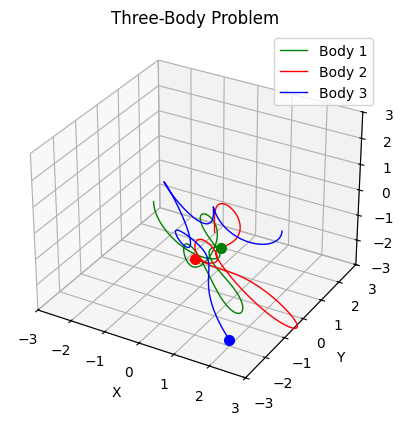

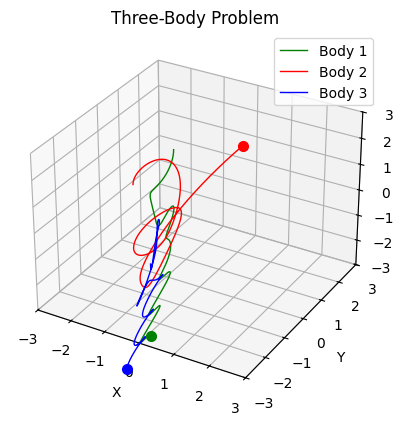

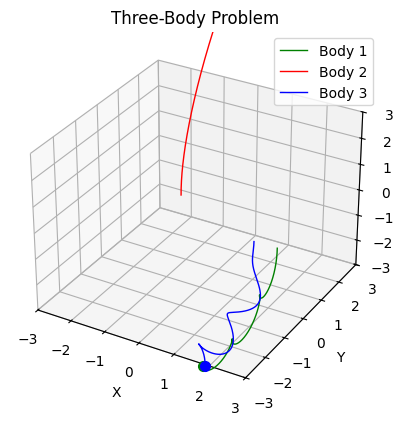

In [40]:
# Generate 3 different videos with random initial conditions
for _ in range(3):
    simulate_and_save_video()